# Robust regression

## Imports

In [1]:
import numpy as np
from numpy.random import normal, uniform

In [2]:
import pandas as pd

In [3]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [4]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt

## Matplotlib configuration

In [5]:
plt.rc('font',   size=16)          # controls default text sizes
plt.rc('axes',   titlesize=18)     # fontsize of the axes title
plt.rc('axes',   labelsize=18)     # fontsize of the x and y labels
plt.rc('xtick',  labelsize=18)     # fontsize of the tick labels
plt.rc('ytick',  labelsize=18)     # fontsize of the tick labels
plt.rc('legend', fontsize=18)      # legend fontsize
plt.rc('figure', titlesize=18)     # fontsize of the figure title

## Dataset

I take the same (convenient) dataset as in the statsmodel documentation

In [6]:
rng = np.random.default_rng(82)
N = 50
x = np.linspace(0, 20, N)
mu = 5 + x + 0.001 * (x-5)**2                    # noiseless
y = mu + rng.normal(0, 0.75, N)                  # with noise
y[[0, 2, 7]] += 8                                # 3 outliers
y[[39,41,43,45,48]] -= 8                         # 5 more outliers
data = pd.DataFrame({'y': y, 'x': x})

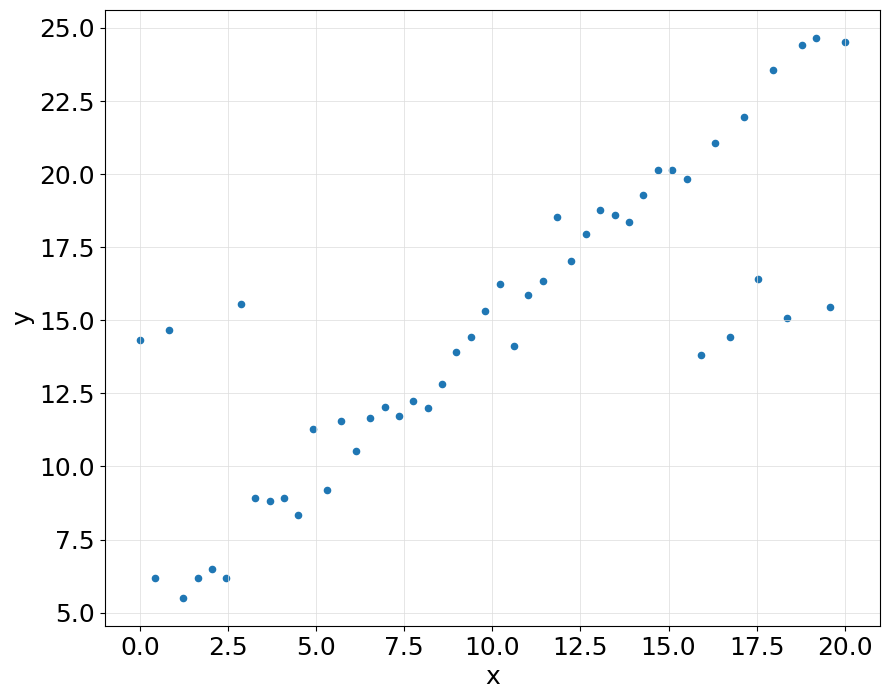

In [7]:
matplotlib.rcParams['text.usetex'] = False
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.scatter(x, y, s=20) 
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_facecolor('white')
ax.grid(True, color='gainsboro', linestyle='-', linewidth=0.5)
plt.show()

## OLS fit

In [8]:
X = np.column_stack([np.ones_like(x), x, (x-5)**2])

In [9]:
myModel = sm.OLS(y, X)
myFit = myModel.fit()

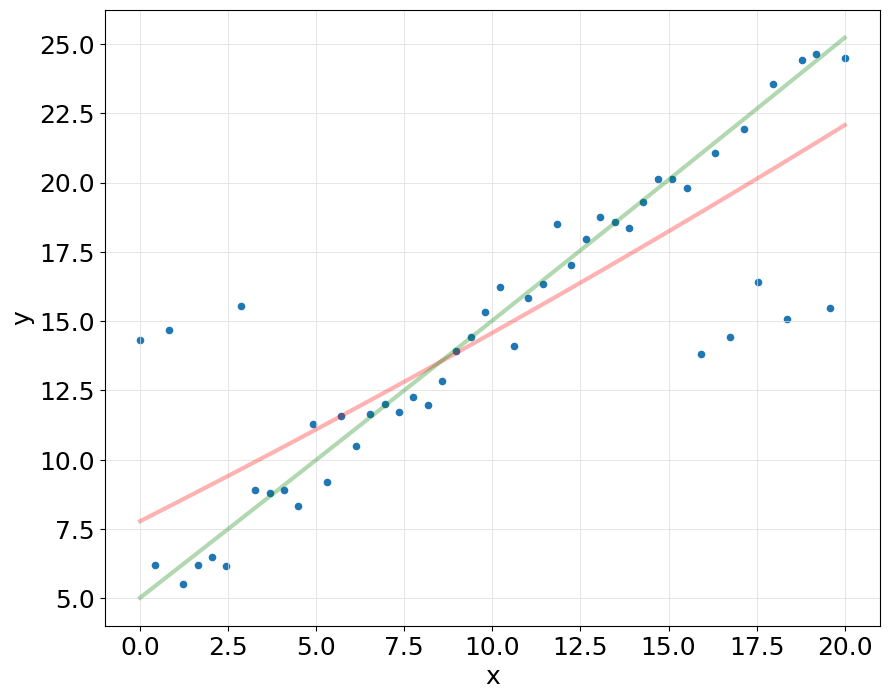

In [10]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.scatter(x, y, s=20)
ax.plot(x, myFit.fittedvalues, color="r", linewidth=3, alpha=0.3)
ax.plot(x, mu, color="g", linewidth=3, alpha=0.3)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid(True, color='gainsboro', linestyle='-', linewidth=0.5)
plt.show()

## Huber's method

In [11]:
t = np.linspace(-4, 4, 100)
delta = 1.34
z = np.select([np.abs(t) < delta, np.abs(t) >= delta], [t**2, 2*delta*np.abs(t)-delta**2])

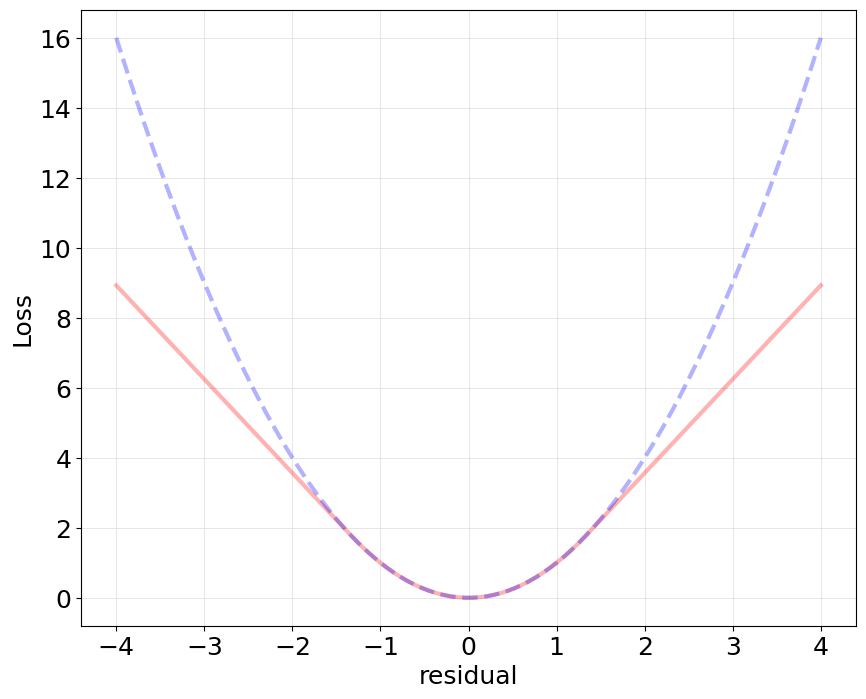

In [12]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.plot(t, z, color="r", linewidth=3, alpha=0.3)
ax.plot(t, t**2, color="b", linewidth=3, linestyle="dashed", alpha=0.3)
ax.set_xlabel("residual")
ax.set_ylabel("Loss")
ax.grid(True, color='gainsboro', linestyle='-', linewidth=0.5)
plt.show()

In [13]:
myModel = sm.RLM(y, X, M=sm.robust.norms.HuberT())
myFit = myModel.fit()

Note that `sm.robust.norms.HuberT` accepts an argument, e.g. `sm.robust.norms.HuberT(c=1.34)` to determine from when the loss function should become linear.

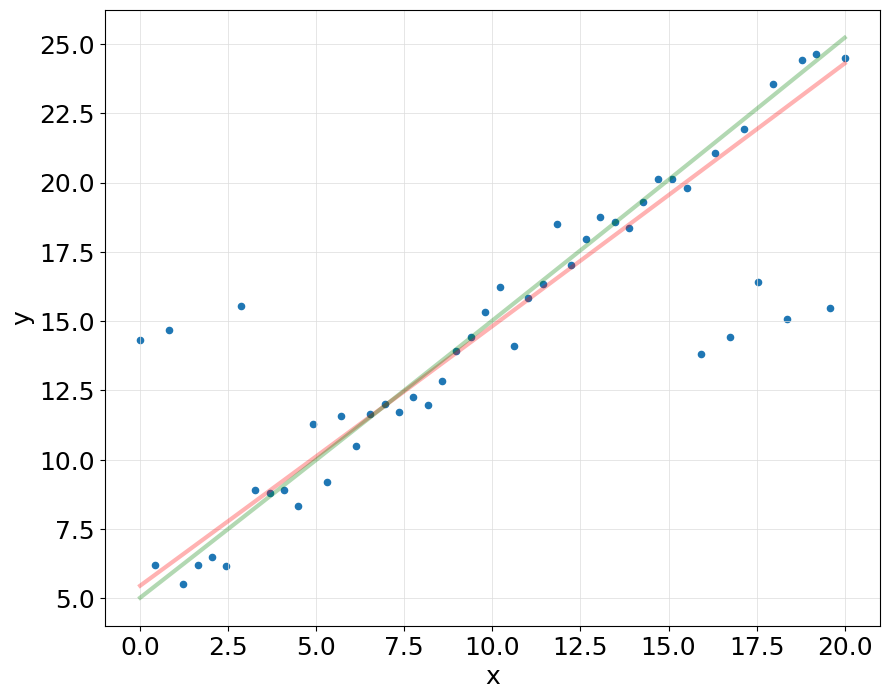

In [14]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.scatter(x, y, s=20)
ax.plot(x, myFit.fittedvalues, color="r", linewidth=3, alpha=0.3)
ax.plot(x, mu, color="g", linewidth=3, alpha=0.3)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid(True, color='gainsboro', linestyle='-', linewidth=0.5)
plt.show()

In [15]:
myFit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                    Robust linear Model Regression Results                    
==============================================================================
Dep. Variable:                      y   No. Observations:                   50
Model:                            RLM   Df Residuals:                       47
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Thu, 02 Mar 2023                                         
Time:                        16:20:10                                         
No. Iterations:                    15                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.4441      0.408     13.342      0.000       4.644       6.244
x1             0.9365      0.063     14.866      0.000       0.813       1.060
x2             0.0006      0.006      0.100      0.920      -0.010       0.011
==============================================================================

If the model instance has been used for another fit with different fit parameters, then the fit options might not be the correct ones anymore .
"""

## Andrew's wave regression

In [16]:
t = np.linspace(-2, 2, 100)
delta = 1.34
z = np.select([np.abs(t) < delta, np.abs(t) >= delta], [delta/np.pi*(1-np.cos(np.pi/delta*t)), 2*delta/np.pi])

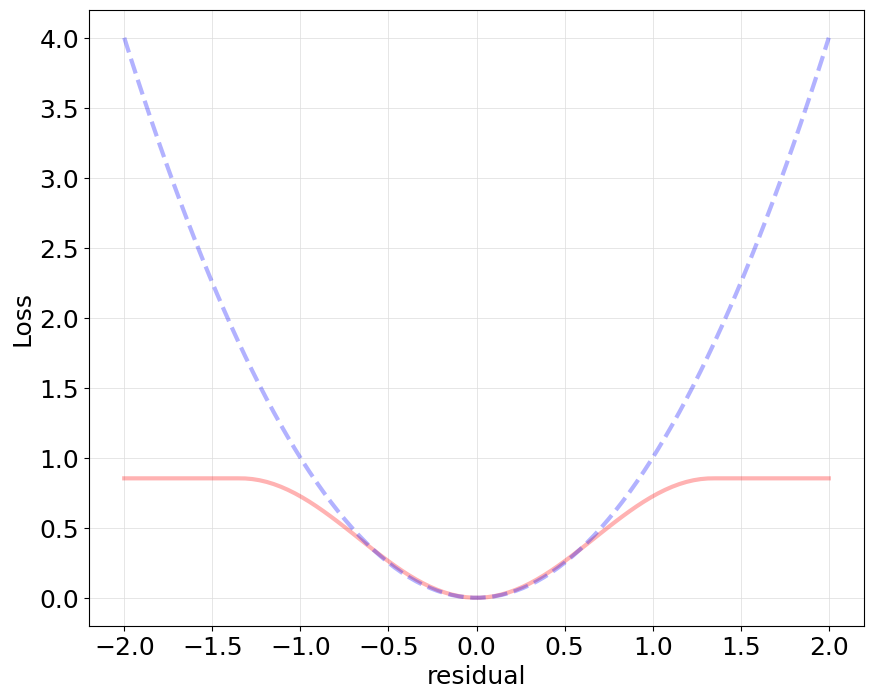

In [17]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.plot(t, z, color="r", linewidth=3, alpha=0.3)
ax.plot(t, t**2, color="b", linewidth=3, linestyle="dashed", alpha=0.3)
ax.set_xlabel("residual")
ax.set_ylabel("Loss")
ax.grid(True, color='gainsboro', linestyle='-', linewidth=0.5)
plt.show()

In [18]:
myFit = sm.RLM(y, X, M=sm.robust.norms.AndrewWave()).fit()

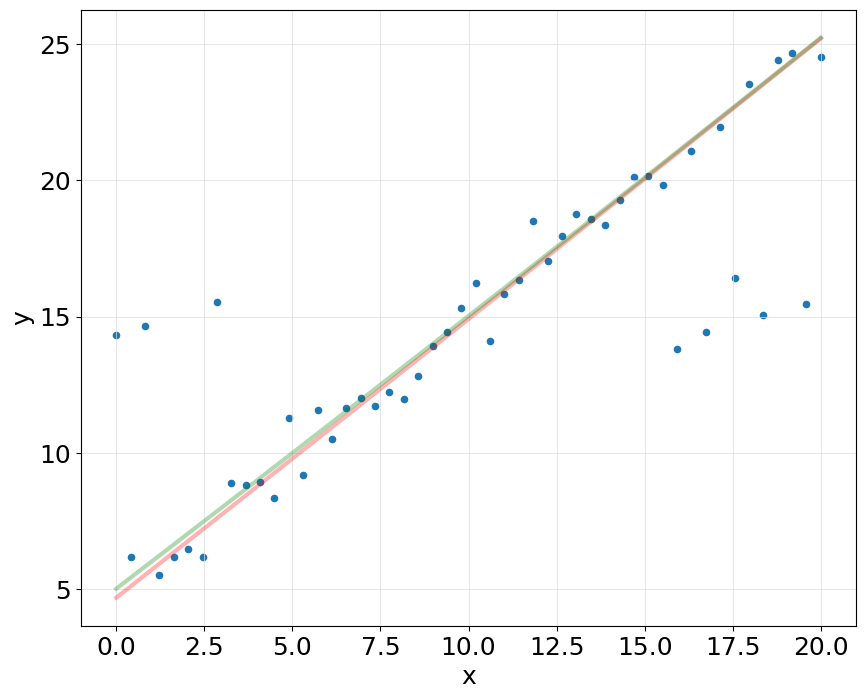

In [19]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.scatter(x, y, s=20)
ax.plot(x, myFit.fittedvalues, color="r", linewidth=3, alpha=0.3)
ax.plot(x, mu, color="g", linewidth=3, alpha=0.3)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid(True, color='gainsboro', linestyle='-', linewidth=0.5)
plt.show()

## Trimmed mean regression

In [20]:
myFit = sm.RLM(y, X, M=sm.robust.norms.TrimmedMean()).fit()

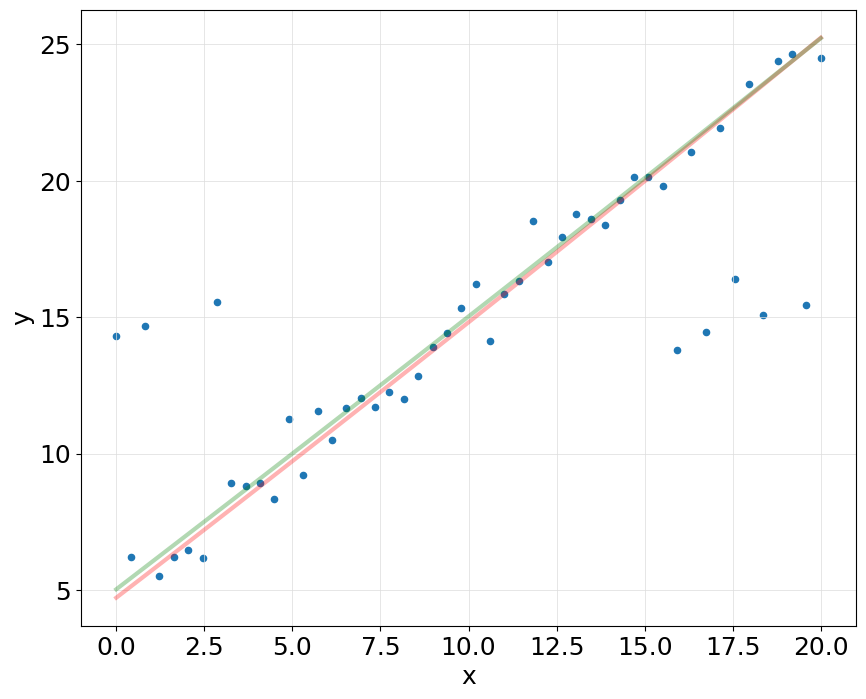

In [21]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.scatter(x, y, s=20)
ax.plot(x, myFit.fittedvalues, color="r", linewidth=3, alpha=0.3)
ax.plot(x, mu, color="g", linewidth=3, alpha=0.3)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid(True, color='gainsboro', linestyle='-', linewidth=0.5)
plt.show()

## Tukey's Biweight regression

In [22]:
t = np.linspace(-2., 2., 100)
delta = 2.
z = np.select([np.abs(t) < delta, np.abs(t) >= delta], [delta**2/6*(1-(1-(t/delta)**2)**3), delta**2/6])

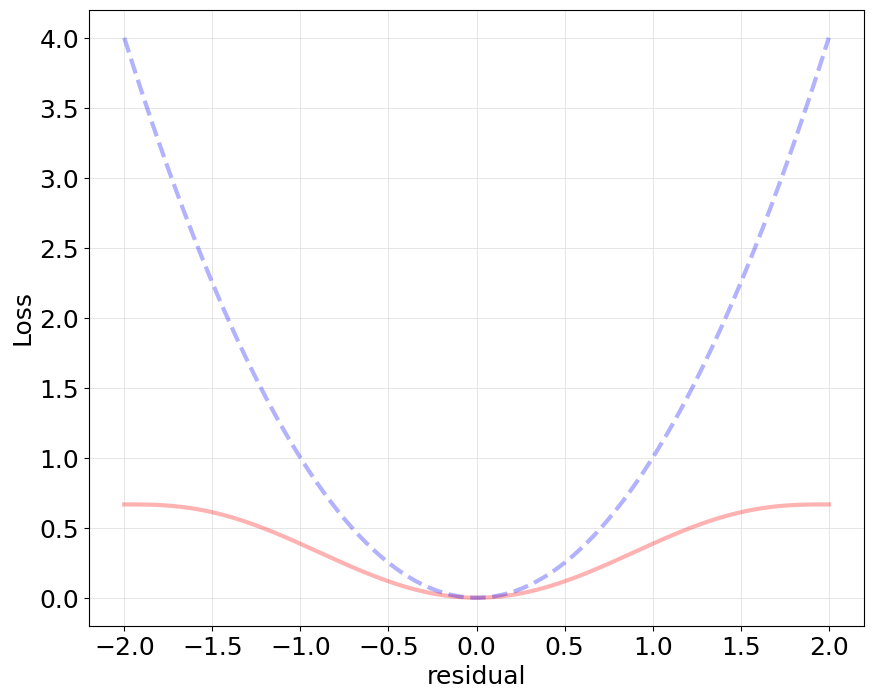

In [23]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.plot(t, z, color="r", linewidth=3, alpha=0.3)
ax.plot(t, t**2, color="b", linewidth=3, linestyle="dashed", alpha=0.3)
ax.set_xlabel("residual")
ax.set_ylabel("Loss")
ax.grid(True, color='gainsboro', linestyle='-', linewidth=0.5)
plt.show()

In [24]:
myFit = sm.RLM(y, X, M=sm.robust.norms.TukeyBiweight(c=4)).fit()

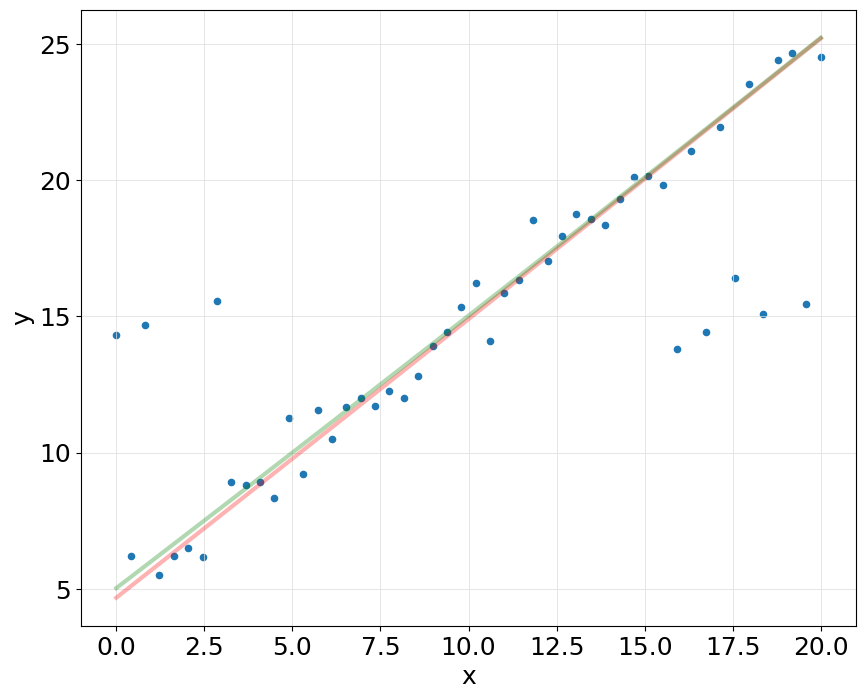

In [25]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.scatter(x, y, s=20)
ax.plot(x, myFit.fittedvalues, color="r", linewidth=3, alpha=0.3)
ax.plot(x, mu, color="g", linewidth=3, alpha=0.3)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid(True, color='gainsboro', linestyle='-', linewidth=0.5)
plt.show()

## Quantile regression

#### Dataset 1

For the first example, we use the same dataset as above.

In [26]:
myModel = smf.quantreg('y ~ x + I((x-5)**2)', data=data)

For quantile 0.05 : the fraction of observations above the curve is: 0.1
For quantile 0.25 : the fraction of observations above the curve is: 0.26
For quantile 0.5 : the fraction of observations above the curve is: 0.48
For quantile 0.75 : the fraction of observations above the curve is: 0.74
For quantile 0.9 : the fraction of observations above the curve is: 0.88


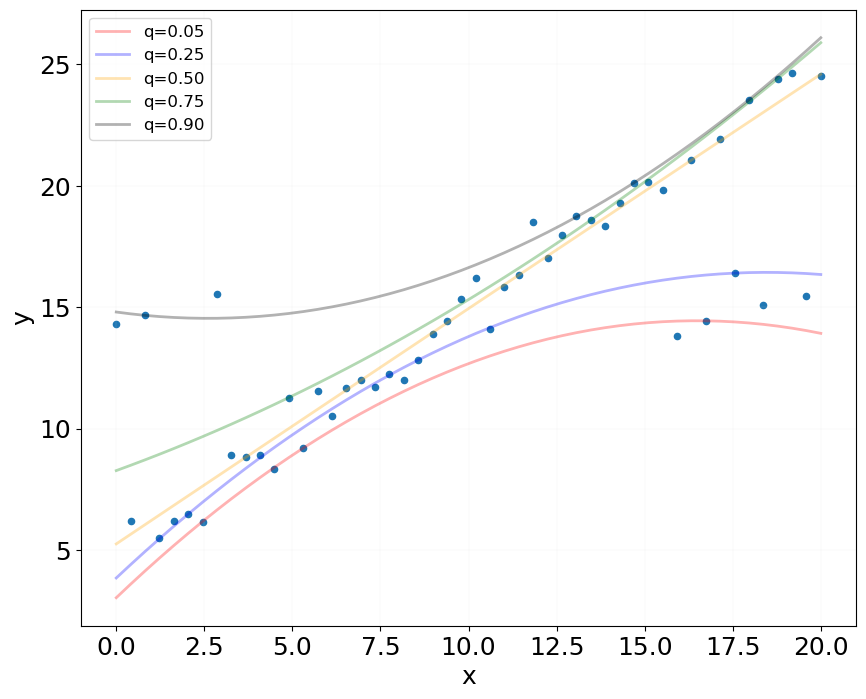

In [27]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.scatter(x, y, s=20)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid(True, color='gainsboro', linestyle='-', linewidth=0.1)

for quantile, color in zip([0.05, 0.25, 0.5, 0.75, 0.9], ["red", "blue", "orange", "green", "black"]):                          # quantile=0.5 corresponds to the median.
    myFit = myModel.fit(quantile)
    fractionAboveCurve = len(np.where(myFit.fittedvalues >= y)[0]) / len(y)
    print("For quantile {0} : the fraction of observations above the curve is: {1}".format(quantile, fractionAboveCurve))
    ax.plot(x, myFit.fittedvalues, color=color, linewidth=2, alpha=0.3, label="q={0:4.2f}".format(quantile))
    
ax.legend(loc=2, fontsize=12)
plt.show()

In [28]:
myFit = myModel.fit(q=0.5)                                  # median
myFit.summary(xname = ['Intercept', 'x', '(x-5)^2'])

<class 'statsmodels.iolib.summary.Summary'>
"""
                         QuantReg Regression Results                          
==============================================================================
Dep. Variable:                      y   Pseudo R-squared:               0.5747
Model:                       QuantReg   Bandwidth:                       1.389
Method:                 Least Squares   Sparsity:                        3.060
Date:                Thu, 02 Mar 2023   No. Observations:                   50
Time:                        16:20:50   Df Residuals:                       47
                                        Df Model:                            2
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2589      0.511     10.298      0.000       4.232       6.286
x              0.9690      0.079     12.292      0.000       0.810       1.128
(x-5)^2       -0.0002      0.007     -0.028      0.978      -0.014       0.014
==============================================================================
"""

#### Dataset 2

Another dataset to illustrate least quantile regression

In [29]:
np.random.seed(80)
N = 100
x = np.linspace(0, 20, N)
mu = 2 + 0.75 * x 
y = mu + normal(0, 3, N)                      # with noise
data = pd.DataFrame({'y': y, 'x': x})

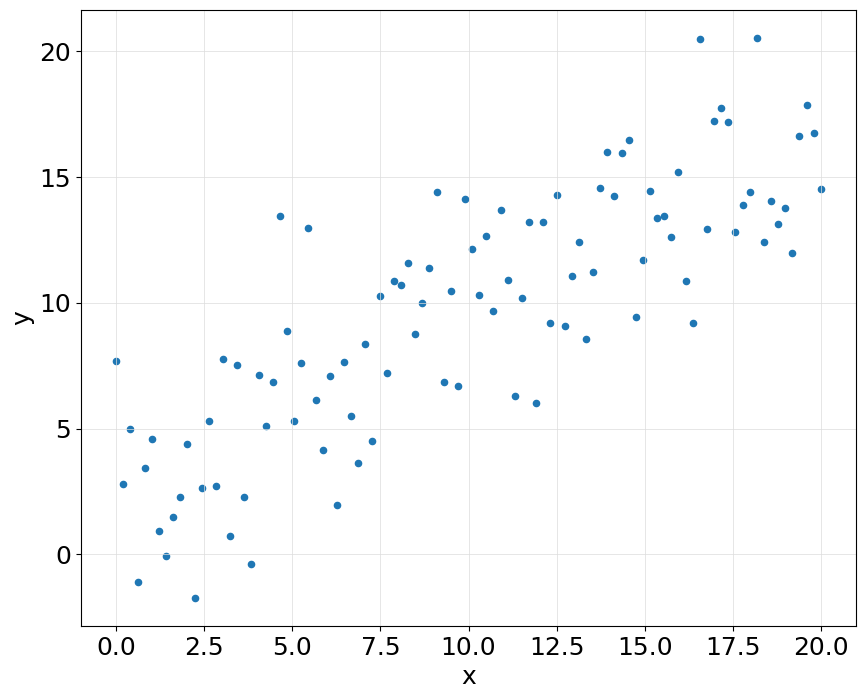

In [30]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.scatter(x, y, s=20)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid(True, color='gainsboro', linestyle='-', linewidth=0.5)
plt.show()

In [31]:
myModel = smf.quantreg('y ~ x ', data=data)

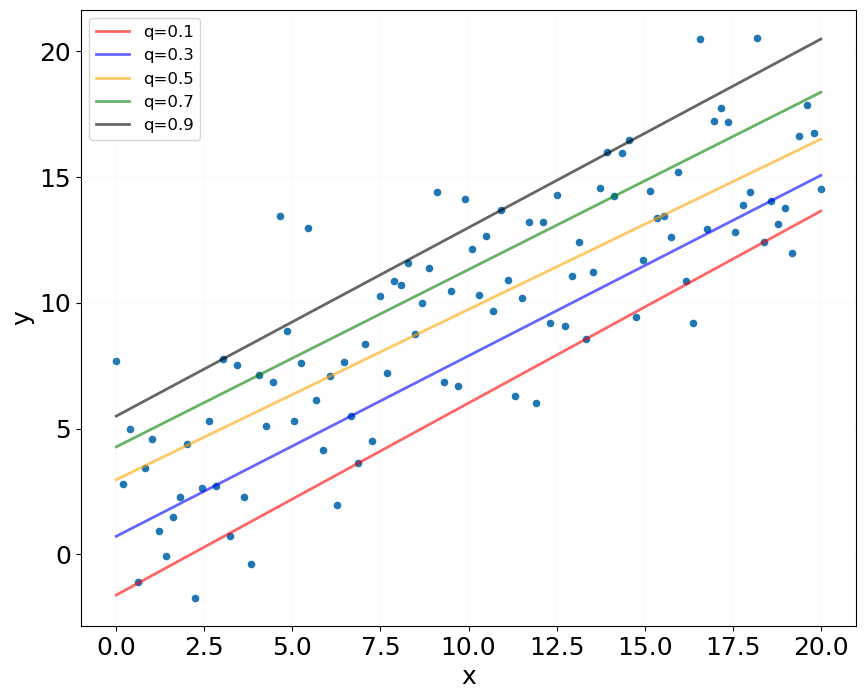

In [32]:
fig, ax = plt.subplots(1,1, figsize=(10,8))
ax.scatter(x, y, s=20)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.grid(True, color='gainsboro', linestyle='-', linewidth=0.1)

for quantile, color in zip([0.1, 0.3, 0.5, 0.7, 0.9], ["red", "blue", "orange", "green", "black"]):                          # quantile=0.5 corresponds to the median.
    myFit = myModel.fit(quantile)
    fractionAboveCurve = len(np.where(myFit.fittedvalues > y)[0]) / len(y)
    ax.plot(x, myFit.fittedvalues, color=color, linewidth=2, alpha=0.6, label="q={0}".format(quantile))

ax.legend(loc=2, fontsize=12)
plt.show()

***